In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

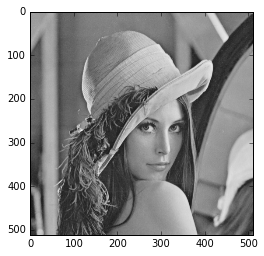

In [2]:
# 3-5-5-5-3 octagon kernel process on white pixel
kernel = [[-2, -1], [-2, 0], [-2, 1],
          [-1, -2], [-1, -1], [-1, 0], [-1, 1], [-1, 2], 
          [0, -2], [0, -1], [0, 0], [0, 1], [0, 2],
          [1, -2], [1, -1], [1, 0], [1, 1], [1, 2],
          [2, -1], [2, 0], [2, 1]]
img = Image.open('lena.bmp')
plt.figure(1)
fig = plt.imshow(np.asarray(img), cmap='gray', vmin=0, vmax=255)

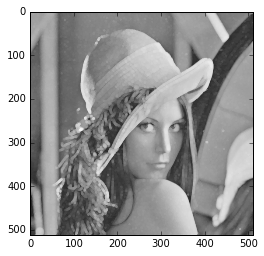

In [4]:
def dilation(img, kernel):
    height, width = img.size
    new_img = np.empty(shape=(height, width))
    img = np.asarray(img)
    for i in range(height):
        for j in range(width):
            if img[i][j] > 0:
                maximum = 0
                for ele in kernel:
                    p, q = ele
                    if (i + p) >= 0 and (i + p) <= (width - 1) and \
                       (j + q) >= 0 and (j + q) <= (height - 1):
                        if img[i + p][j + q] > maximum:
                            maximum = img[i + p][j + q]
                for ele in kernel:
                    p, q = ele
                    if (i + p) >= 0 and (i + p) <= (width - 1) and \
                       (j + q) >= 0 and (j + q) <= (height - 1):
                        new_img[i + p][j + q] = maximum
    return new_img.astype('uint8')  
    
dilation_img = Image.fromarray(dilation(img, kernel))
dilation_img.save('dilation_lena.bmp')
plt.figure(2)
fig = plt.imshow(np.asarray(dilation_img), cmap='gray', vmin=0, vmax=255)

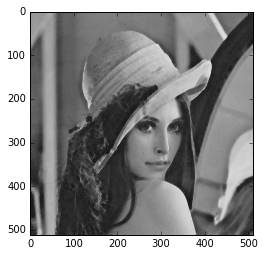

In [5]:
def erosion(img, kernel):
    height, width = img.size
    new_img = np.empty(shape=(height, width))
    img = np.asarray(img)
    for i in range(height):
        for j in range(width):
            if img[i][j] > 0:
                flag = True
                minimun = np.inf
                for ele in kernel:
                    p, q = ele
                    if (i + p) >= 0 and (i + p) <= (height - 1) and \
                       (j + q) >= 0 and (j + q) <= (width - 1):
                        if img[i + p][j + q] == 0:
                            flag = False
                            break
                        if img[i + p][j + q] < minimun:
                            minimun = img[i + p][j + q]
                flag = True
                for ele in kernel:
                    p, q = ele
                    if (i + p) >= 0 and (i + p) <= (height - 1) and \
                       (j + q) >= 0 and (j + q) <= (width - 1):
                        if img[i + p][j + q] == 0:
                            flag = False
                            break
                    if (i + p) >= 0 and (i + p) <= (height- 1) and \
                       (j + q) >= 0 and (j + q) <= (width - 1) and \
                       flag:
                        new_img[i + p][j + q] = minimun
    return new_img.astype('uint8')
   
erosion_img = Image.fromarray(erosion(img, kernel))
erosion_img.save('erosion_lena.bmp')
plt.figure(4)
fig = plt.imshow(np.asarray(erosion_img), cmap='gray', vmin=0, vmax=255)

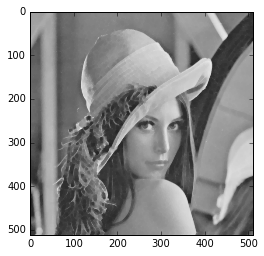

In [6]:
def closing(img, kernel):
    dilation_img = dilation(img, kernel)
    closing_img = erosion(Image.fromarray(dilation_img), kernel)
    return closing_img.astype('uint8')

closing_img = Image.fromarray(closing(img, kernel))
closing_img.save('closing_lena.bmp')
plt.figure(5)
fig = plt.imshow(np.asarray(closing_img), cmap='gray', vmin=0, vmax=255)

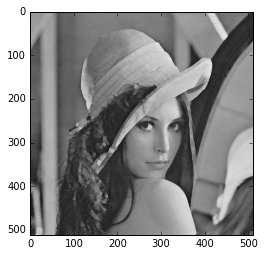

In [7]:
def opening(img, kernel):
    erosion_img = erosion(img, kernel)
    opening_img = dilation(Image.fromarray(erosion_img), kernel)
    return opening_img.astype('uint8')

opening_img = Image.fromarray(opening(img, kernel))
opening_img.save('opening_img.bmp')
plt.figure(6)
fig = plt.imshow(np.asarray(opening_img), cmap='gray', vmin=0, vmax=255)